# Lista 4 - Modelos Não Lineares

## Exercício 1)
oh boy

### I)

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings("ignore")


def make_data(n=150, seed=0):

    np.random.seed(seed)
    x1 = np.random.uniform(-5, 5, n)
    x2 = np.random.uniform(-5, 5, n)
    y = 0.05*(x1**3 +x1**2+x1 + 1) > x2

    aux_df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
    aux_df['y'] = aux_df['y'].apply(int)
    
    return aux_df



In [2]:
import warnings
warnings.filterwarnings("ignore")

df_train = make_data()
df_train.head()

,x1,x2,y
0,0.488135,-3.505517,1
1,2.151894,3.681261,0
2,1.027634,-3.375071,1
3,0.448832,1.155596,0
4,-0.763452,-3.761800,1


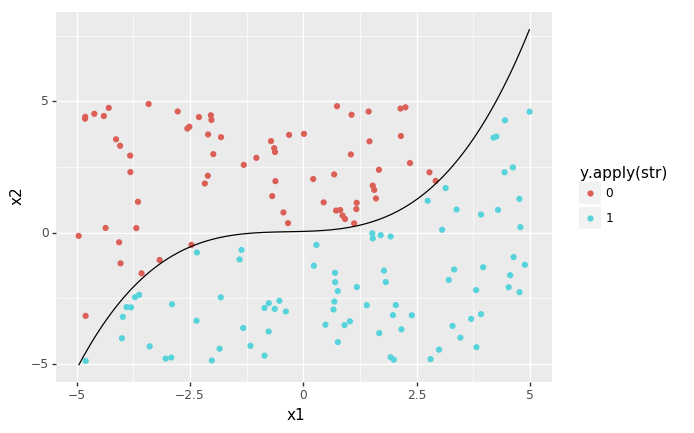

<ggplot: (-9223372036565109479)>

In [3]:
ggaux = (
    ggplot(df_train, aes(x='x1', y='x2', color='y.apply(str)')) +
    geom_point() +
    stat_function(fun = lambda x1: 0.05*(x1**3 +x1**2+x1 + 1), color='black')
)

ggaux

In [4]:
df_test = make_data(seed=100)

### II)
Construa um classificador SVM linear com os parâmetros C = 2 e tol = 0.001. Calcule o erro de classificação de treinamento, de teste e o número de vetores suporte em cada caso. Plote as regiões de decisão definidas pelo classificador e as margens correspondentes.

In [5]:
from sklearn.svm import SVC

# -- fit -- #
X_train = df_train[['x1', 'x2']]
y_train = df_train[['y']]

X_test = df_test[['x1', 'x2']]
y_test = df_test[['y']]



svc = SVC(C = 2, tol = 0.001, kernel='linear')
svc.fit(X_train, y_train)

df_train['y_pred'] = svc.predict(X_train)

# -- errors -- #
from sklearn.metrics import accuracy_score

train_error = 1-accuracy_score(y_train, svc.predict(X_train))
test_error = 1-accuracy_score(y_test, svc.predict(X_test))


In [6]:

print('train error: {}'.format(train_error))
print('test error: {}'.format(test_error))

print('support verctors')
pd.DataFrame(svc.support_vectors_).T

train error: 0.07333333333333336
test error: 0.09999999999999998
support verctors


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.917250,2.781568,-3.566467,1.176355,1.120957,1.16934,1.531083,-0.336892,1.563296,0.865129,...,-1.362892,-3.979552,-3.896249,-3.618170,-3.798034,-2.346105,4.621885,3.137978,4.194826,4.988470
1,1.974288,2.299906,-1.546483,1.139660,0.356328,0.89910,1.793928,0.365792,1.630782,0.654213,...,-0.655834,-3.203963,-2.831030,-2.366776,-2.844923,-0.753145,2.486636,1.699165,3.621915,4.608347


(490, 498)


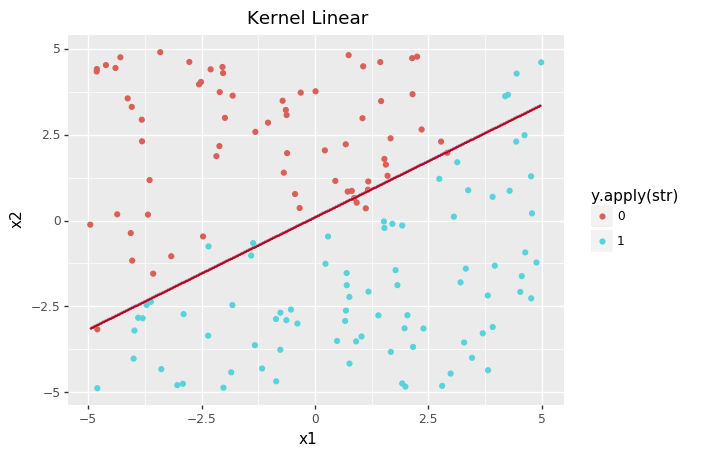

In [7]:
ggaux = (
    ggplot(df_train, aes(x='x1', y='x2', color='y.apply(str)')) +
    labs(title='Kernel Linear')+
    geom_point()
)


fig = ggaux.draw()
axes = fig.get_axes()
for ax in axes:
    # Plot more stuff
    xx = np.array(np.meshgrid(df_train['x1']))
    yy = np.array(np.meshgrid(df_train['x2']))
    
    xx, yy = np.meshgrid(np.arange(xx.min(), xx.max(), .02),
                         np.arange(yy.min(), yy.max(), .02))
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.coolwarm)

### III)
O mesmo que II mas com kernel não-linear (RBF kernel)

In [8]:

svc = SVC(C = 2, tol = 0.001, kernel='rbf')
svc.fit(X_train, y_train)

df_train['y_pred'] = svc.predict(X_train)

# -- errors -- #
from sklearn.metrics import accuracy_score

train_error = 1-accuracy_score(y_train, svc.predict(X_train))
test_error = 1-accuracy_score(y_test, svc.predict(X_test))


In [9]:

print('train error: {}'.format(train_error))
print('test error: {}'.format(test_error))
print('support verctors')
print('\n')
pd.DataFrame(svc.support_vectors_).T

train error: 0.0
test error: 0.020000000000000018
support verctors




,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.624128,2.917250,2.781568,-3.817256,-3.566467,1.120957,-2.467084,-0.336892,-3.410304,-1.312748,...,3.137978,3.817354,-2.017177,1.521033,-1.324381,3.919234,2.038886,-3.997731,4.194826,4.988470
1,3.073190,1.974288,2.299906,2.936977,-1.546483,0.356328,-0.463032,0.365792,4.903389,2.583787,...,1.699165,-4.360447,-4.867631,-0.026086,-3.630997,-3.101521,-2.756830,-4.021555,3.621915,4.608347


(490, 498)


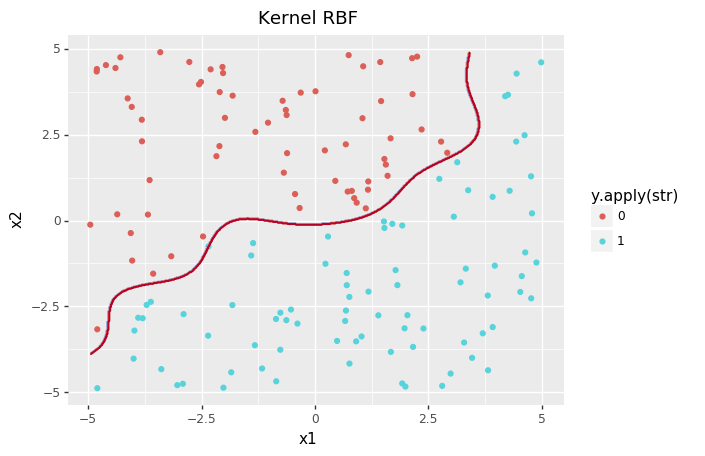

In [10]:
ggaux = (
    ggplot(df_train, aes(x='x1', y='x2', color='y.apply(str)')) +
    labs(title='Kernel RBF')+
    geom_point()
)


fig = ggaux.draw()
axes = fig.get_axes()
for ax in axes:
    # Plot more stuff
    xx = np.array(np.meshgrid(df_train['x1']))
    yy = np.array(np.meshgrid(df_train['x2']))
    
    xx, yy = np.meshgrid(np.arange(xx.min(), xx.max(), .02),
                         np.arange(yy.min(), yy.max(), .02))
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.coolwarm)

### IV

Repita o passo III usando um kernel polynomial dado por $(x^Ty+β)^n$ para (n,β) = (5,0) e (3,1).

train error: 0.053333333333333344
test error: 0.12
support verctors


(490, 498)


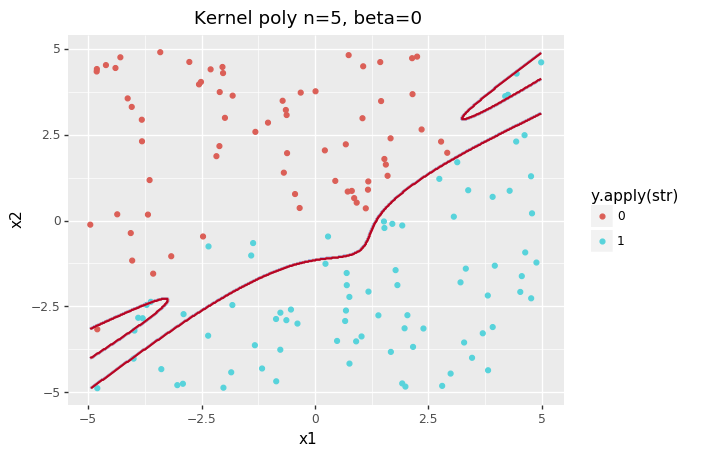

In [11]:

svc = SVC(C = 2, tol = 0.001, kernel='poly', degree=5, coef0=0)
svc.fit(X_train, y_train)

df_train['y_pred'] = svc.predict(X_train)

# -- errors -- #
from sklearn.metrics import accuracy_score

train_error = 1-accuracy_score(y_train, svc.predict(X_train))
test_error = 1-accuracy_score(y_test, svc.predict(X_test))

print('train error: {}'.format(train_error))
print('test error: {}'.format(test_error))
print('support verctors')
print('\n')
pd.DataFrame(svc.support_vectors_).T





ggaux = (
    ggplot(df_train, aes(x='x1', y='x2', color='y.apply(str)')) +
    labs(title='Kernel poly n=5, beta=0')+
    geom_point()
)


fig = ggaux.draw()
axes = fig.get_axes()
for ax in axes:
    # Plot more stuff
    xx = np.array(np.meshgrid(df_train['x1']))
    yy = np.array(np.meshgrid(df_train['x2']))
    
    xx, yy = np.meshgrid(np.arange(xx.min(), xx.max(), .02),
                         np.arange(yy.min(), yy.max(), .02))
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.coolwarm)


train error: 0.0
test error: 0.00666666666666671
support verctors


(490, 498)


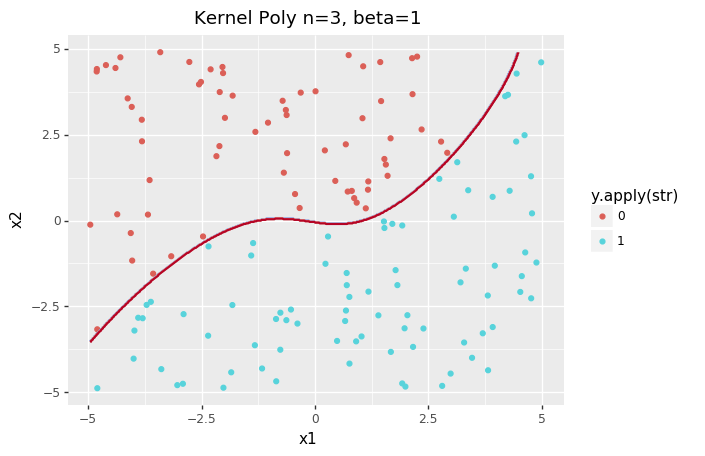

In [12]:

svc = SVC(C = 2, tol = 0.001, kernel='poly', degree=3, coef0=1)
svc.fit(X_train, y_train)

df_train['y_pred'] = svc.predict(X_train)

# -- errors -- #
from sklearn.metrics import accuracy_score

train_error = 1-accuracy_score(y_train, svc.predict(X_train))
test_error = 1-accuracy_score(y_test, svc.predict(X_test))

print('train error: {}'.format(train_error))
print('test error: {}'.format(test_error))
print('support verctors')
print('\n')
pd.DataFrame(svc.support_vectors_).T



ggaux = (
    ggplot(df_train, aes(x='x1', y='x2', color='y.apply(str)')) +
    labs(title='Kernel Poly n=3, beta=1')+
    geom_point()
)


fig = ggaux.draw()
axes = fig.get_axes()
for ax in axes:
    # Plot more stuff
    xx = np.array(np.meshgrid(df_train['x1']))
    yy = np.array(np.meshgrid(df_train['x2']))
    
    xx, yy = np.meshgrid(np.arange(xx.min(), xx.max(), .02),
                         np.arange(yy.min(), yy.max(), .02))
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.coolwarm)



O conjunto de hiperparâmetros (5,0) montra-se mais flexível e capaz de separar conjuntos de dados mais não lineares. Porém o conjunto (3,1) separou melhor os dados desse exemplo. Além disso, como já era esperado, o segundo modelo tem menor erro de teste. Isso ocorre pois trata-se de um modelo mais regularizado, que naturalmente tende a ter menor erro de teste. Sendo assim, o segundo modelo é mais adequado para o problema porposto. 

#### V
Construa um classificador SVM não-linear com kernel RBF e os parâmetros σ = 1,5 e com
kernel polinomial e os parâmetros n = 3 and β = 1. Em ambos os casos, use tol = 0,001 e C =
0,2, 20, 200. Compare e comente os resultados.

In [13]:
from sklearn.model_selection import GridSearchCV
#from sklearn.scoring import accuracy_score

scoring_ = {'accuracy':'accuracy'
            , 'precision': 'precision'
            , 'recall': 'recall'}

models = {
    'svc_rbf': GridSearchCV(
        SVC(tol = 0.001, kernel='rbf', gamma=1.5)
        , param_grid ={'C': [0.2, 20, 200]}
        , refit=False
        , scoring=scoring_
        , cv = 10
    )
    , 'svc_poly': GridSearchCV(
        SVC(tol = 0.001, kernel='poly', degree=3, coef0=1)
        , param_grid ={'C': [0.2, 20, 200]}
        , refit=False
        , scoring=scoring_
        , cv = 10
    )
}


errors = {}
dfs = {}
for model in models.items():
    model[1].fit(X_train, y_train)



In [14]:
aux = pd.DataFrame(models['svc_rbf'].cv_results_)
aux['kernel'] = 'rbf'

aux2 = pd.DataFrame(models['svc_poly'].cv_results_)
aux2['kernel'] = 'poly'

results_df = pd.concat([aux, aux2])


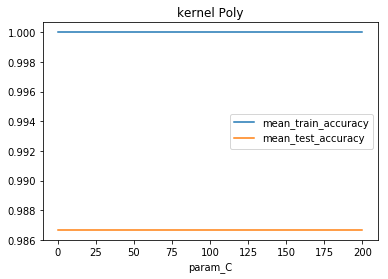

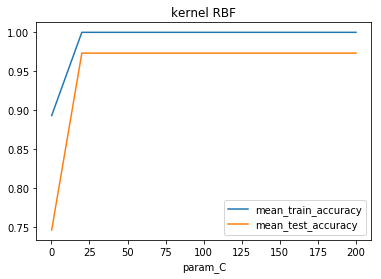

In [15]:
results_df.columns

# results_df.plot(x = 'param_C', y = ['mean_train_accuracy', 'mean_test_accuracy'])
results_df.query('kernel == "poly"').plot(
    x = 'param_C'
    , y = ['mean_train_accuracy', 'mean_test_accuracy']
    , title = 'kernel Poly'
)

results_df.query('kernel == "rbf"').plot(
    x = 'param_C'
    , y = ['mean_train_accuracy', 'mean_test_accuracy']
    , title = 'kernel RBF'
)

No estimador com kernel poly a alteraçõa dos valores de C não trouxeram mudanças na média da acurácia. Para o kernel RBF o aumento de C eumentou significativamente a acurácia.

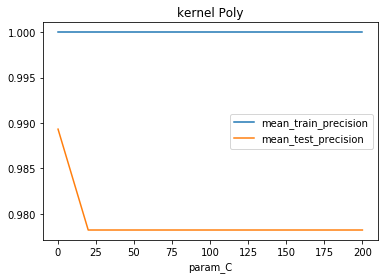

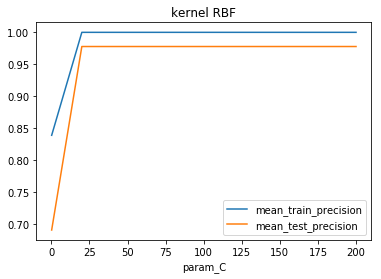

In [16]:

results_df.query('kernel == "poly"').plot(
    x = 'param_C'
    , y = ['mean_train_precision', 'mean_test_precision']
    , title = 'kernel Poly'
)

results_df.query('kernel == "rbf"').plot(
    x = 'param_C'
    , y = ['mean_train_precision', 'mean_test_precision']
    , title = 'kernel RBF'
)


O aumento nos valores de C resultaram em queda irisória na precisão do conjunto de deste com o estimador polinomial. Já para o kernel RBF o aumento de C resultou num aumetno espressivo das acurácias de treino e teste.

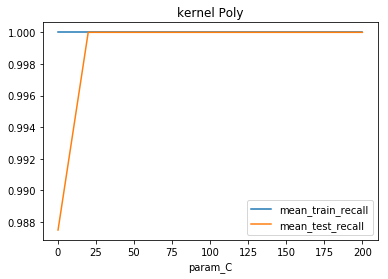

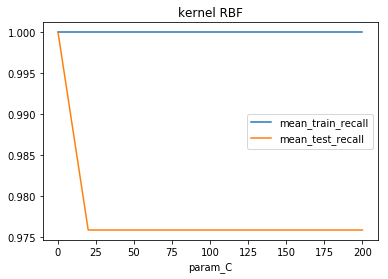

In [17]:

results_df.query('kernel == "poly"').plot(
    x = 'param_C'
    , y = ['mean_train_recall', 'mean_test_recall']
    , title = 'kernel Poly'
)

results_df.query('kernel == "rbf"').plot(
    x = 'param_C'
    , y = ['mean_train_recall', 'mean_test_recall']
    , title = 'kernel RBF'
)

Para o kernel polinomial o aumetno de C trouxe um sutil no recall no conjunto de teste. A queda do recall de teste foi expressiva no conjunto de teste para o estimador RBF.

## Exercício 2
###### I Gere e plote os dados

In [18]:
mu11 = [0,3]
mu12 = [11, -2]
mu21 = [3, -2]
mu22 = [7.5, 4]
mu3 = [7,2]

S11 = [.2,0,0,2]
S12 = [3,0,0,.5]
S21 = [5,0,0,.5]
S22 = [7,0,0,.5]
S3 = [8,0,0,.5]



In [19]:

def gen_gaussian_mix(mu, sigma, n):

    index = len(mu)
    index = np.random.choice(index, size=n)

    mu = [mu[0], mu[1]]
    sigma = [np.array(sigma[0]).reshape([2, 2]), np.array(sigma[1]).reshape([2, 2])]
    sample = [np.random.multivariate_normal(mu[i], sigma[i]) for i in index]
    sample = np.array(sample)

    sample = pd.DataFrame(sample)
    sample.columns = ['x1', 'x2']


    return sample


# -- conjuntos treino e teste
conjutos = []
for i in [1,2]:
    w1 = gen_gaussian_mix([mu11, mu12], [S11, S12], 1000)
    w1['Class'] = np.repeat('1',w1.shape[0])

    w2 = gen_gaussian_mix([mu21, mu22], [S21, S22], 1000)
    w2['Class'] = np.repeat('2',w2.shape[0])

    w3 = gen_gaussian_mix([mu3, mu3], [S3, S3], 500)
    w3['Class'] = np.repeat('3',w3.shape[0])
    
    aux_df = pd.concat([w1, w2, w3])
    conjutos.append(aux_df)
    
df_train = conjutos[0]
df_test = conjutos[1]


In [20]:
print(type(df_train['Class'][0]))
df_train['Class'][0]
df_train.head()

<class 'pandas.core.series.Series'>


,x1,x2,Class
0,9.142822,-1.614306,1
1,0.536130,3.762505,1
2,-0.310092,2.891331,1
3,-1.014558,1.660774,1
4,11.369949,-2.894531,1


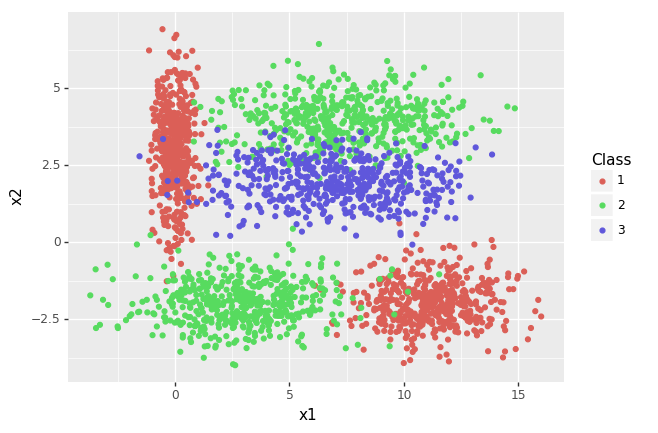

<ggplot: (294082375)>

In [21]:
# for i in [1,2,3]:
#    df_train.query('Class == ' + str(i)).plot.scatter(x = 'x1', y='x2', label='class' + str(i))
# I hate low level languages =(


(
    ggplot(aes(x='x1', y='x2', color='Class'), data=df_train) + 
    geom_point()
)

###### II Implemente e vizualize a arvore de decisão

In [43]:
from sklearn.tree import DecisionTreeClassifier

features_ = ['x1', 'x2']
target_ = ['Class']

tree_clf = DecisionTreeClassifier()

tree_clf.fit(df_train[features_], df_train[target_])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf='deprecated', min_samples_split=2,
            min_weight_fraction_leaf='deprecated', presort=False,
            random_state=None, splitter='best')

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], plot_data = True):
    #axes = [X[:,0].min()-10, X[:,0].max()-10, X[:,1].min()-10, X[:,1].max()-10]
    y = y.reshape([-1,])
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    

    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    if plot_data:
        plt.plot(X[:, 0][y=="1"], X[:, 1][y=="1"], "yo", label="1")
        plt.plot(X[:, 0][y=="2"], X[:, 1][y=="2"], "bs", label="2")
        plt.plot(X[:, 0][y=="3"], X[:, 1][y=="3"], "g^", label="3")
    
    plt.axis(axes)
    plt.legend(loc="lower right", fontsize=14)



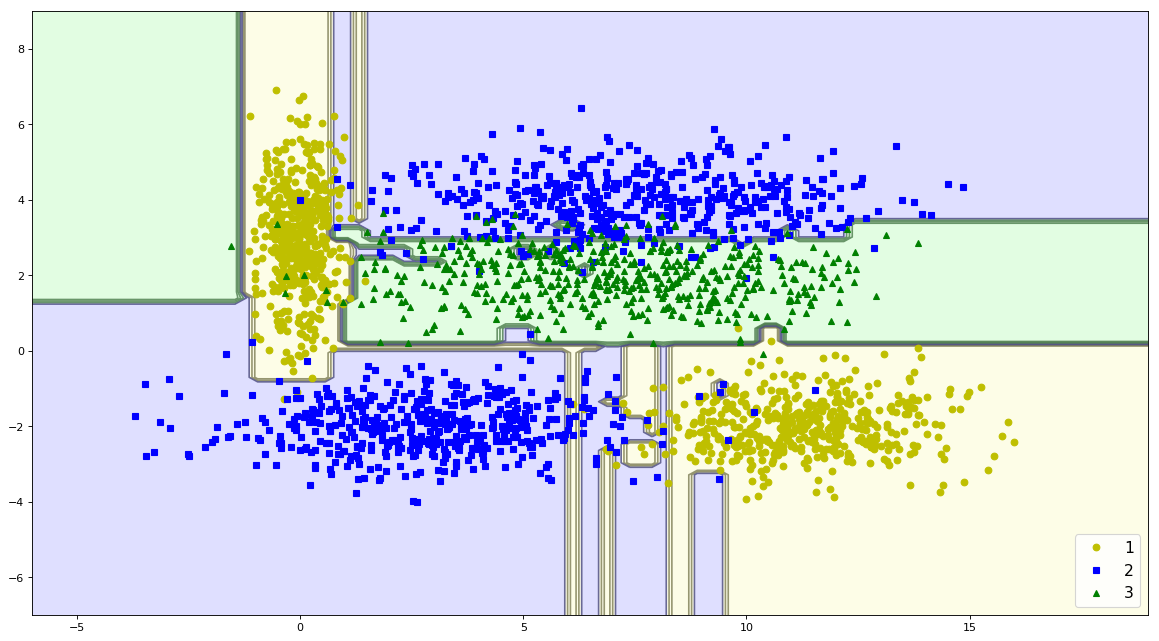

In [45]:
fig=plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plot_decision_boundary(tree_clf, df_train[features_].values, df_train[target_].values, axes=[-6,19,-7,9])

plt.plot(0, 4, "bs", label="2")

###### III. Calcule os erros de classificação de treinamento e de teste e comente os resultados.

In [46]:
train_error = 1-accuracy_score(df_train[target_], tree_clf.predict(df_train[features_]))
test_error = 1-accuracy_score(df_test[target_], tree_clf.predict(df_test[features_]))

print('train_error: {}'.format(train_error))
print('test_error: {}'.format(test_error))


train_error: 0.0
test_error: 0.07240000000000002


Somente o erro de treino já sugere que há overfitting. Essa hipótese se confirma quando vemos que o erro de teste é de 6%. O gráfico mostra que a arvore faz fronteiras de decisão muit específicas para poder acomodar observações que podem ser condideradas outliers.

###### IV. Pode a árvore nos níveis 0 (sem poda), 1, ..., 11. Para cada árvore podada, calcule o erro de classificação para o conjunto de teste.

In [47]:
# trees = [DecisionTreeClassifier(max_depth=i).fit(df_train[features_], df_train[target_]).predict(df_test[features_]) for i in range(1,12)]
trees = [DecisionTreeClassifier(max_depth=i).fit(df_train[features_], df_train[target_]) for i in range(1,12)]
errors = [1 - accuracy_score(df_test[target_], i.predict(df_test[features_])) for i in trees]
df_errors = pd.DataFrame({'errors':errors, 'level': range(1,12)})

###### V. Plote os erros de classificação e os níveis de poda e aponte qual o nível que retorna o melhor desempenho de classificação. Que conclusões pode-se realizar ao se analisar esse gráfico?

In [48]:
print('menor erro')
df_errors.sort_values('errors').head(1)

menor erro


,errors,level
3,0.056,4


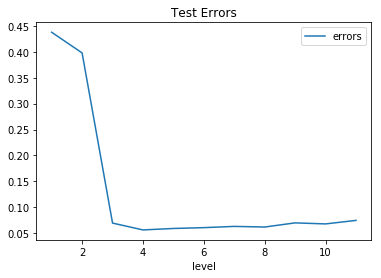

In [49]:
df_errors.plot(x='level', y='errors', title='Test Errors')

O erro de classificação do conjunto de teste decresce fortemente até o nível 3 de poda mantendo-se constante até o nível 6. depois disso o erro volta a aumenta. O menor erro dá-se no nível 4. 

###### VI. Visualize as árvores de decisão (a do item II e a do melhor resultado do item V).


No handles with labels found to put in legend.


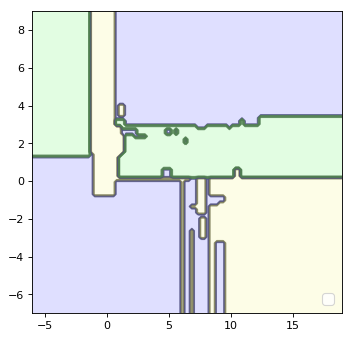

In [50]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plot_decision_boundary(tree, df_train[features_].values, df_train[target_].values, axes=[-6,19,-7,9], plot_data = False)

No handles with labels found to put in legend.


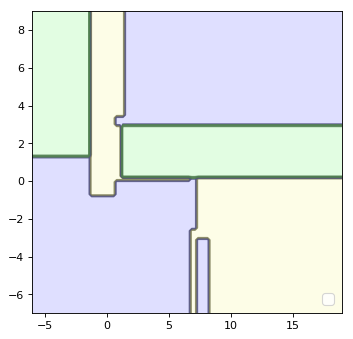

In [51]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plot_decision_boundary(trees[4], df_train[features_].values, df_train[target_].values, axes=[-6,19,-7,9], plot_data = False)

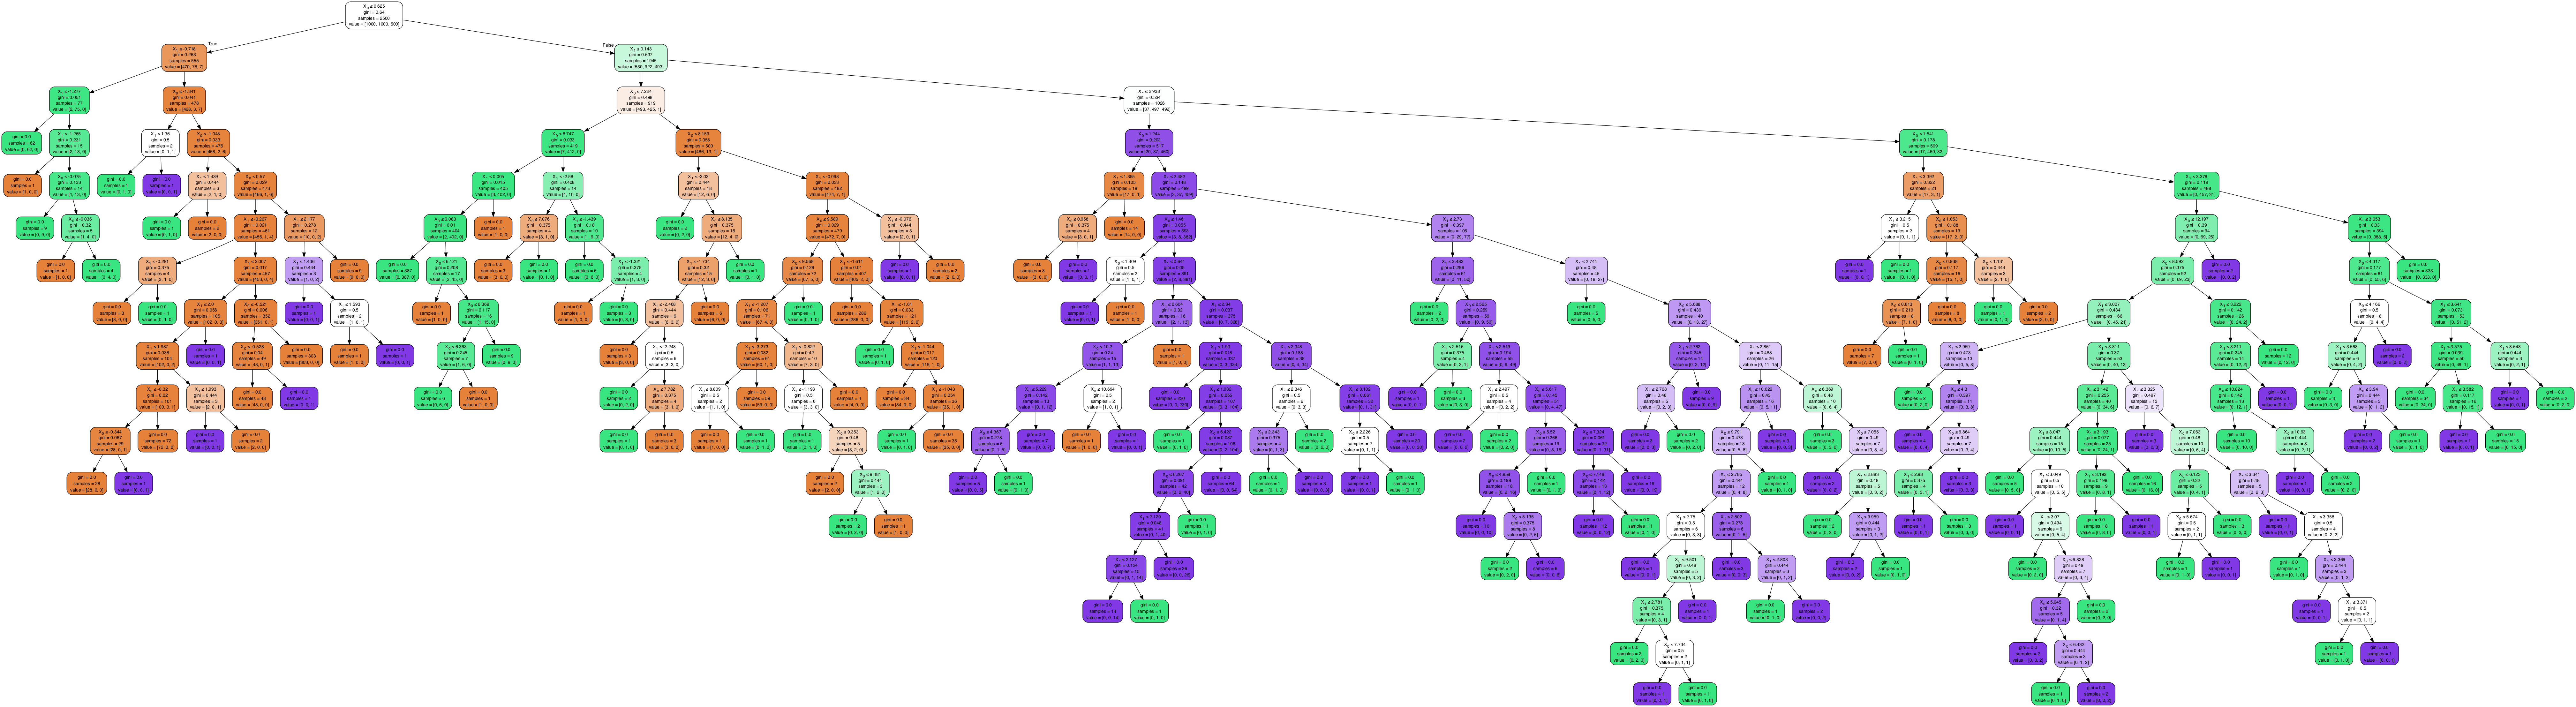

In [75]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    tree_clf
    , out_file=dot_data
    , filled=True, rounded=True
    , special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


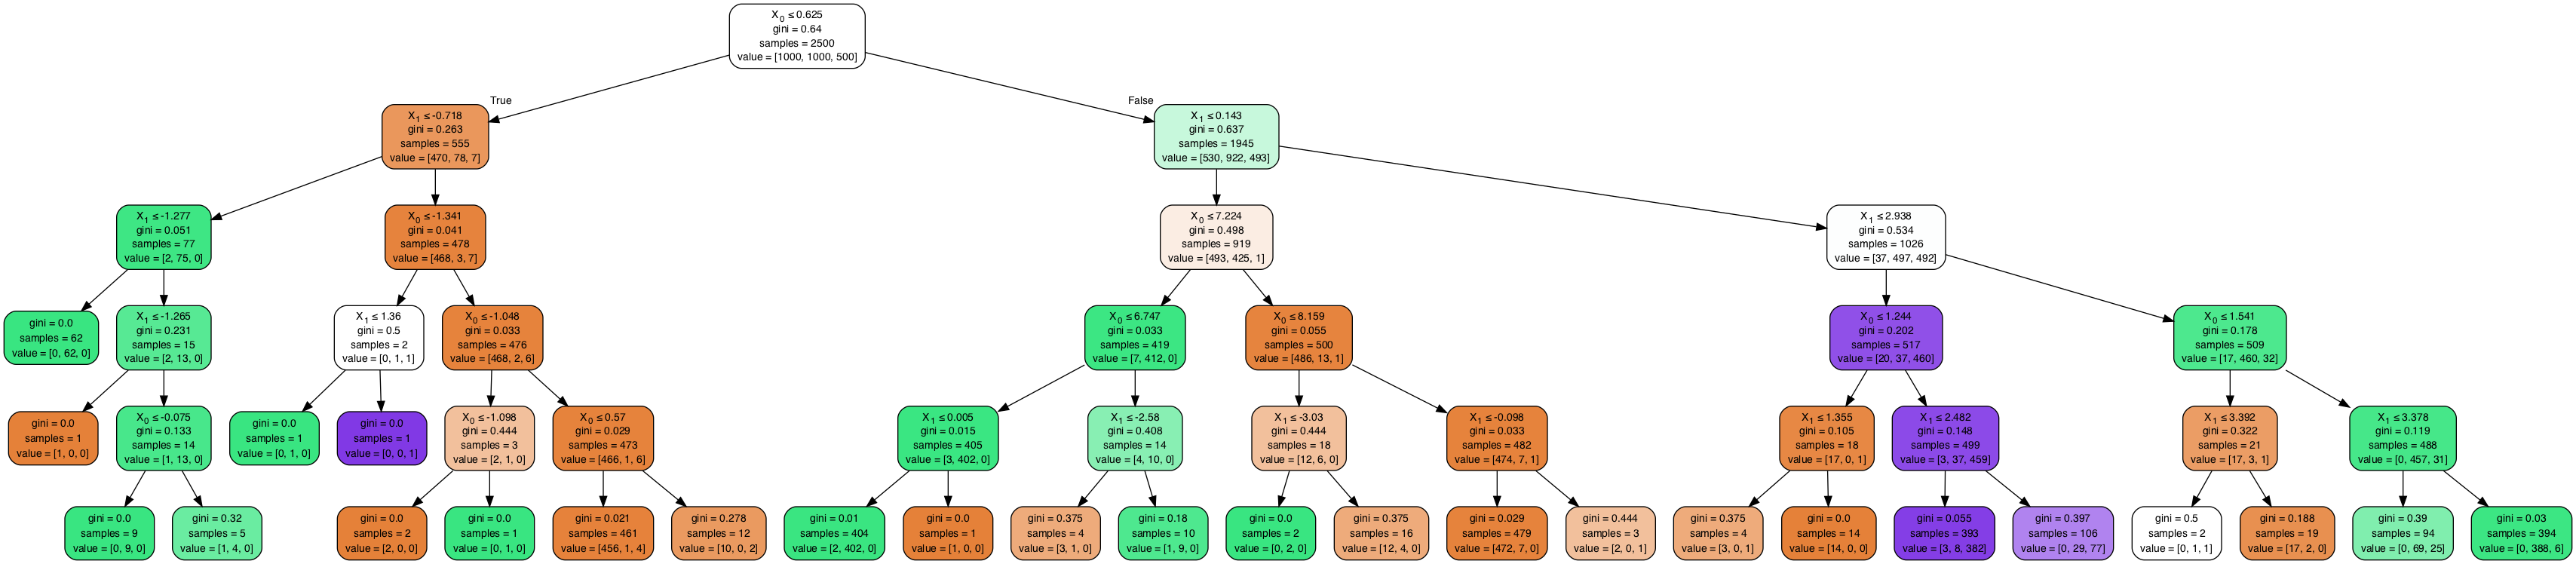

In [76]:
dot_data = StringIO()
export_graphviz(
    trees[4]
    , out_file=dot_data
    , filled=True, rounded=True
    , special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



Como pode ser visto, a arvore podada é não só melhor, como tabém mais simples de interpretar e apresentar aos interessados.

## Ex 
### 3) Considere um problema de classificação bidimensional envolvendo duas classes ω1 e ω2 seguindo a distribuição das classes ω1 e ω2 do exercício anterior.